## Function area

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def mean(lst):
    return(sum(lst)/len(lst))
def pltMaxMin(lst, pMF = 1.2):
    pMin = mean(lst)-pMF*(max(lst)-min(lst))/2
    pMax = mean(lst)+pMF*(max(lst)-min(lst))/2
    return(pMin,pMax)

In [3]:
def datalogger (locationsINsite, sitexINchip = 9, dimINlocation = 2, dataGen = 'random'):
    dimlst = [0] * dimINlocation
    locationlst = [dimlst] * locationsINsite
    sitexlst = [locationlst] * sitexINchip

    for k in range(sitexINchip):
        for j in range(locationsINsite):
            if dataGen == 'random':
                pass
            else:
                print ('Current location: site {}, location {}'.format(k, j))
            for i in range(dimINlocation):
                if dataGen == 'random':
                    dimlst[i] = 250 + np.floor(50*(np.floor(100*np.random.rand())/100))
                else:
                    inp = input()
                    if inp == '' or inp == '+' or inp == '.' :
                        dimlst[i] = 0
                    else:
                        dimlst[i] = float(inp)
            locationlst[j] = dimlst
            dimlst = [0] * dimINlocation
        sitexlst[k] = locationlst
        locationlst = [dimlst] * locationsINsite
    sitexarr = np.array(sitexlst)
    return (sitexarr)

In [28]:
def spreadPlotCon (sitexarr, sitexINchip = 9):
    xWidthAvg = [0]*sitexINchip
    yWidthAvg = [0]*sitexINchip
    for s in np.arange(sitexINchip):
        xWidthAvg[s] = np.average(sitexarr[s,:,0])
        yWidthAvg[s] = np.average(sitexarr[s,:,1])

    xWidthAvg = np.reshape(xWidthAvg,(int(np.sqrt(sitexINchip)), int(np.sqrt(sitexINchip))))
    yWidthAvg = np.reshape(yWidthAvg,(int(np.sqrt(sitexINchip)), int(np.sqrt(sitexINchip))))

#     print(xWidthAvg, '\n\n', yWidthAvg)
    
    f = plt.figure(figsize=(12,4))
    left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
    ax = f.add_axes([left, bottom, width, height]) 

    plt.subplot(121)
    X = np.arange(np.sqrt(sitexINchip))
    Y = np.arange(np.sqrt(sitexINchip))[::-1]
    cpx = plt.contourf(X, Y, xWidthAvg)
    plt.colorbar(cpx)
    plt.title('Contour plot on Chip for x-width')
    plt.xlabel('x-location')
    plt.ylabel('y-location')
    plt.grid(True)

    plt.subplot(122)
    X = np.arange(np.sqrt(sitexINchip))
    Y = np.arange(np.sqrt(sitexINchip))[::-1]
    cpy = plt.contourf(X, Y, yWidthAvg)
    plt.colorbar(cpy)
    plt.title('Contour plot on Chip for y-width')
    plt.xlabel('x-location')
    plt.ylabel('y-location')
    plt.grid(True)

    plt.show()

In [36]:
def spreadPlotConSing (sitexarr, sitexINchip = 9, dimID = 0):
    xWidthAvg = [0]*sitexINchip
    for s in np.arange(sitexINchip):
        xWidthAvg[s] = np.average(sitexarr[s,:,dimID])

    xWidthAvg = np.reshape(xWidthAvg,(int(np.sqrt(sitexINchip)), int(np.sqrt(sitexINchip))))

    X = np.arange(np.sqrt(sitexINchip))
    Y = np.arange(np.sqrt(sitexINchip))[::-1]
    cpx = plt.contourf(X, Y, xWidthAvg)
    plt.colorbar(cpx)
    plt.title('Contour plot on Chip for x-width')
    plt.xlabel('x-location')
    plt.ylabel('y-location')
    plt.grid(True)

    plt.show()

In [5]:
def speardPlotBar(sitexarr, siteInd = 0):
    x_width = sitexarr[siteInd-1,:,0]
    y_width = sitexarr[siteInd-1,:,1]
    loc = np.arange(len(x_width)) +1

    pMF = 1.2
    f = plt.figure(figsize=(10,6))

    ax1 = plt.subplot(221)
    plt.bar(loc, x_width)
    plt.xticks(loc)
#     plt.ylim(pltMaxMin(x_width)[0], pltMaxMin(x_width)[1])
    plt.title('width x-spread')
    plt.xlabel('location (left to right)')
    plt.ylabel('width ($\mu m$)')
    plt.grid(True)

    ax2 = plt.subplot(222)
    plt.bar(loc, y_width)
    plt.xticks(loc)
#     plt.ylim(pltMaxMin(y_width)[0], pltMaxMin(y_width)[1])
    plt.title('width y-spread')
    plt.xlabel('location (left to right)')
    plt.ylabel('width ($\mu m$)')
    plt.grid(True)

    ax3 = plt.subplot(223)
    plt.bar(loc, y_width*x_width)
    plt.xticks(loc)
#     plt.ylim(pltMaxMin(y_width*x_width)[0], pltMaxMin(y_width*x_width)[1])
    plt.title('junction area spread')
    plt.xlabel('location (left to right)')
    plt.ylabel('area ($\mu m^2$)')
    plt.grid(True)

    ax3 = plt.subplot(224)
    plt.plot(loc, y_width/x_width, 'o')
    plt.xticks(loc)
#     plt.ylim(pltMaxMin(y_width/x_width)[0], pltMaxMin(y_width/x_width)[1])
    plt.ylim(0.5,1.5)
    plt.title('aspect ratio spread')
    plt.xlabel('location (left to right)')
    plt.ylabel('aspect ratio (y/x)')
    plt.grid(True)

    f.tight_layout()
    f.suptitle('site #{}'.format(siteInd+1))
    f.subplots_adjust(top=0.93)
    plt.show()
    return(x_width)

## Test area

In [73]:
locations = 1
site = 9
dim = 1

sitexarr = datalogger(locationsINsite = locations, sitexINchip = site, dimINlocation = dim, dataGen = 'rando')

Current location: site 0, location 0
126
Current location: site 1, location 0
134.78
Current location: site 2, location 0
134.52
Current location: site 3, location 0
120.07
Current location: site 4, location 0
127.94
Current location: site 5, location 0
133.64
Current location: site 6, location 0
127.90
Current location: site 7, location 0
124.02
Current location: site 8, location 0
122.75


Current location: site 0, location 0
9
Current location: site 1, location 0
5
Current location: site 2, location 0
1
Current location: site 3, location 0
3
Current location: site 4, location 0
3
Current location: site 5, location 0
3
Current location: site 6, location 0
3
Current location: site 7, location 0
3
Current location: site 8, location 0
3


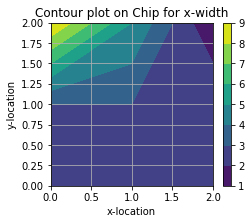

In [77]:
locations = 1
site = 9
dim = 1

sitexarr = datalogger(locationsINsite = locations, sitexINchip = site, dimINlocation = dim, dataGen = 'rando')

f = plt.figure(figsize=(8,3))
plt.subplot(121)
spreadPlotConSing (sitexarr = sitexarr, sitexINchip = site, dimID = 0)

In [6]:
# print(sitexarr[8,:,:])

In [32]:
# print (sitexarr)
# print (sitexarr[siteInd-1,0,:]) #gives both x,y for site 2 (in python indexing is 1) with first location only
# print (sitexarr[siteInd-1,:,0]) #gives the x-value for site 2 (in python indexing is 1) with all 5 locations
# print (sitexarr[siteInd-1,:,0]*sitexarr[siteInd-1,:,1]) #gives the area for site 2 (in python indexing is 1) with all 5
# print(sitexarr[:,:,0])

In [68]:
# spreadPlotCon (sitexarr = sitexarr, sitexINchip = site)

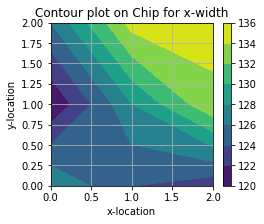

In [74]:
f = plt.figure(figsize=(8,3))
plt.subplot(121)
spreadPlotConSing (sitexarr = sitexarr, sitexINchip = site, dimID = 0)

# f = plt.figure(figsize=(8,3))
# plt.subplot(122)
# spreadPlotConSing (sitexarr = sitexarr, sitexINchip = site, dimID = 1)

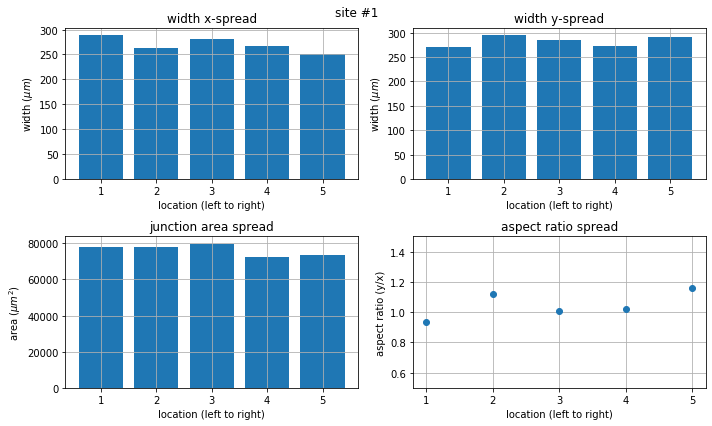

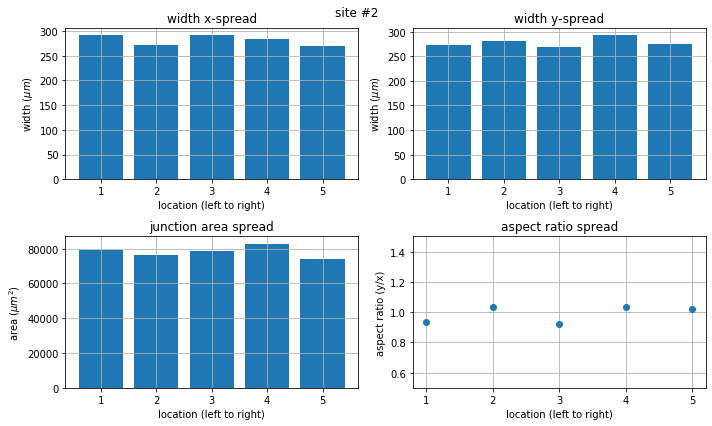

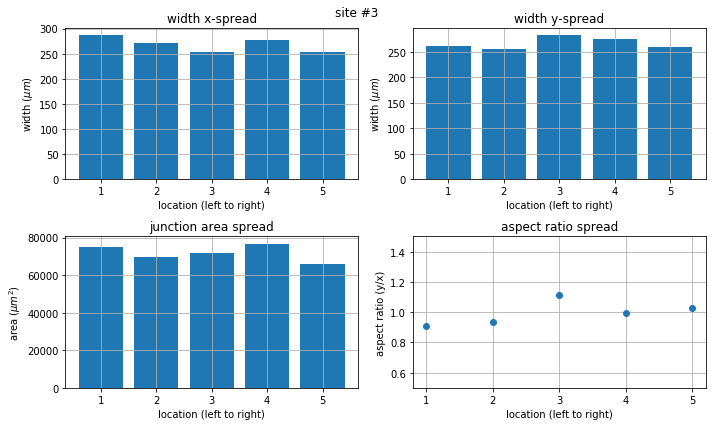

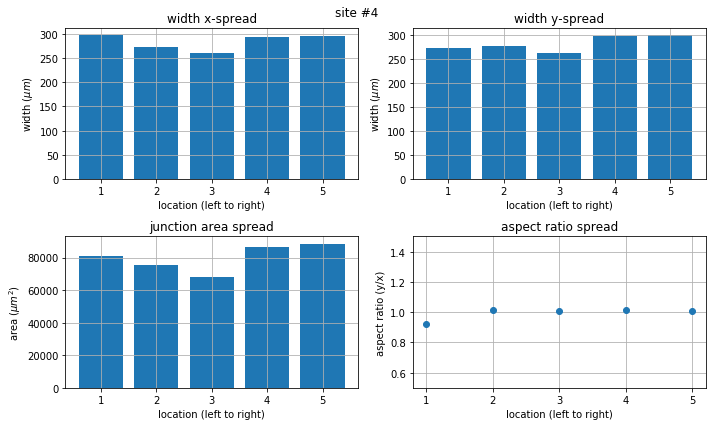

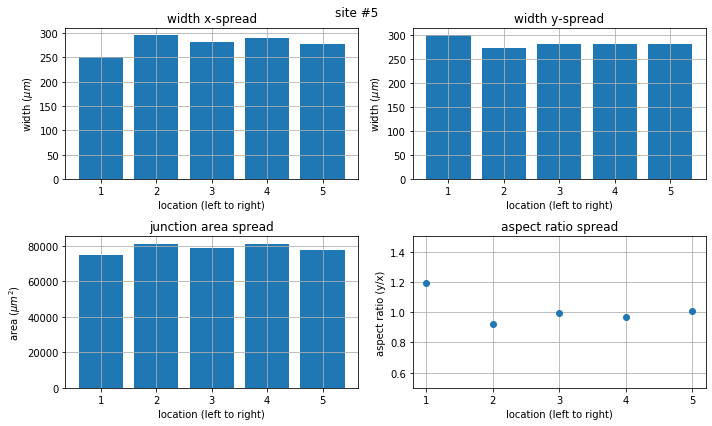

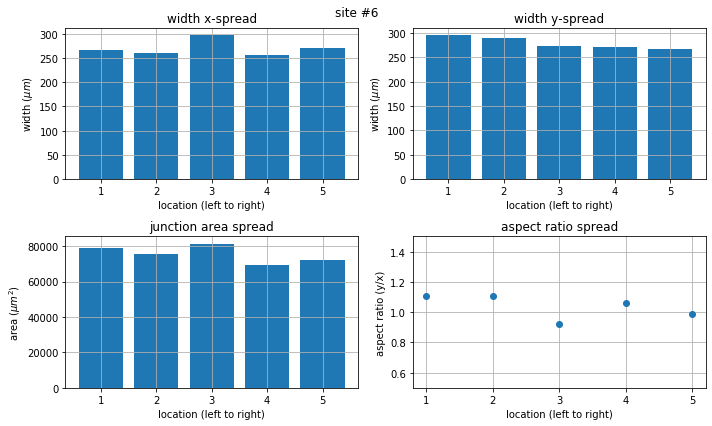

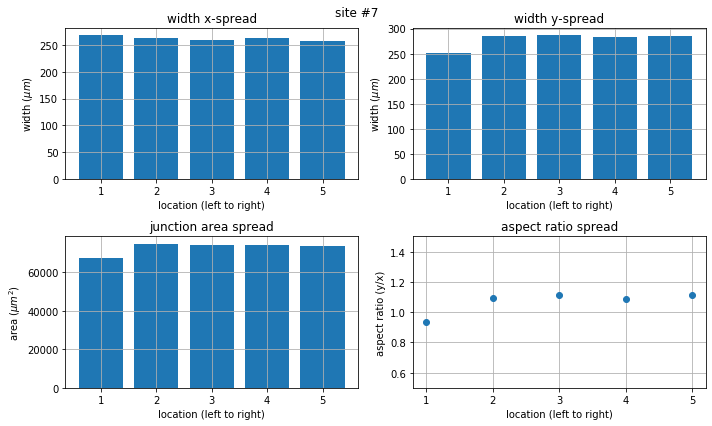

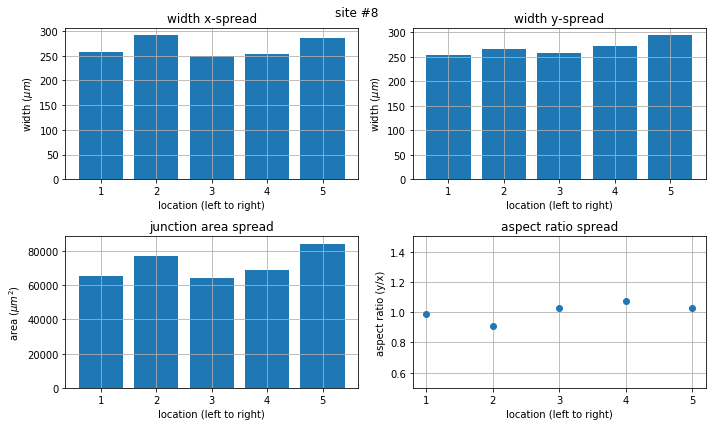

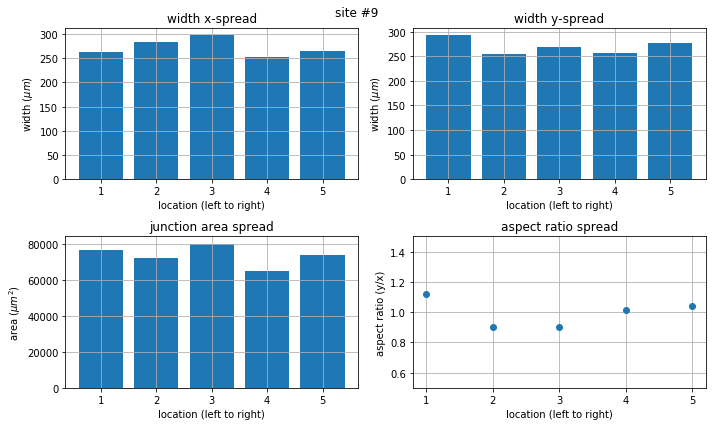

In [9]:
for s in np.arange(site):
    speardPlotBar(siteInd = s, sitexarr = sitexarr)